In [4]:
import numpy as np
import pandas as pd
import os

In [9]:
df=pd.read_csv(r"C:\Users\Tushar\Downloads\1_RUL.csv")
df.head(3)

,T_mean_Vib_Spindle,T_rms_Vib_Spindle,T_var_Vib_Spindle,T_std_Vib_Spindle,T_p2p_Vib_Spindle,T_Entropy_Vib_Spindle,T_skewness_Vib_Spindle,T_kurtosis_Vib_Spindle,T_crest_factor_Vib_Spindle,T_shape_factor_Vib_Spindle,...,F_rms_Current,F_std_Current,F_var_Current,F_kurtosis_Current,F_skewness_Current,F_entropy_Current,F_peak_per_band_Current,wear,time,RUL
0,3.930262,3.930662,0.003143,0.056061,0.452261,8.684657,0.251119,5.156945,1.069373,1.000102,...,0.009640,0.006199,0.000038,3.951908,1.084140,9.878275,4.293312,60,0.016667,111.916667
1,3.929839,3.930226,0.003048,0.055207,0.405884,8.640324,-0.044853,4.621393,1.054846,1.000099,...,0.010112,0.006596,0.000044,4.363705,1.203514,9.893784,4.403873,60,0.033333,111.900000
2,3.923696,3.924089,0.003087,0.055560,0.431540,8.688504,0.053116,4.381669,1.062866,1.000100,...,0.009373,0.006008,0.000036,4.188267,1.130367,9.891784,4.457164,60,0.050000,111.883333


In [10]:
df['Rul_sec']=(df.index.max() - df.index.values)

In [11]:
df.head(3)

,T_mean_Vib_Spindle,T_rms_Vib_Spindle,T_var_Vib_Spindle,T_std_Vib_Spindle,T_p2p_Vib_Spindle,T_Entropy_Vib_Spindle,T_skewness_Vib_Spindle,T_kurtosis_Vib_Spindle,T_crest_factor_Vib_Spindle,T_shape_factor_Vib_Spindle,...,F_std_Current,F_var_Current,F_kurtosis_Current,F_skewness_Current,F_entropy_Current,F_peak_per_band_Current,wear,time,RUL,Rul_sec
0,3.930262,3.930662,0.003143,0.056061,0.452261,8.684657,0.251119,5.156945,1.069373,1.000102,...,0.006199,0.000038,3.951908,1.084140,9.878275,4.293312,60,0.016667,111.916667,6715
1,3.929839,3.930226,0.003048,0.055207,0.405884,8.640324,-0.044853,4.621393,1.054846,1.000099,...,0.006596,0.000044,4.363705,1.203514,9.893784,4.403873,60,0.033333,111.900000,6714
2,3.923696,3.924089,0.003087,0.055560,0.431540,8.688504,0.053116,4.381669,1.062866,1.000100,...,0.006008,0.000036,4.188267,1.130367,9.891784,4.457164,60,0.050000,111.883333,6713


In [12]:
df.shape

(6716, 148)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import array
import numpy as np
from sklearn import metrics

In [14]:
#from numpy import array
#from keras.models import Sequential
#from keras.layers import LSTM
#from keras.layers import Dense
#from keras.layers import Bidirectional
#from keras.layers import Flatten
#from keras.layers import TimeDistributed
#from keras.layers.convolutional import Conv1D
#from keras.layers.convolutional import MaxPooling1D
#from keras.layers import ConvLSTM2D
#from keras.layers import RepeatVector
#from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
#from keras.models import Model
#from keras import regularizers

In [15]:
import keras 
from keras.layers import *
from keras.models import *
from keras import backend as K

In [16]:
dp=df

In [17]:
dp.head()

,T_mean_Vib_Spindle,T_rms_Vib_Spindle,T_var_Vib_Spindle,T_std_Vib_Spindle,T_p2p_Vib_Spindle,T_Entropy_Vib_Spindle,T_skewness_Vib_Spindle,T_kurtosis_Vib_Spindle,T_crest_factor_Vib_Spindle,T_shape_factor_Vib_Spindle,...,F_std_Current,F_var_Current,F_kurtosis_Current,F_skewness_Current,F_entropy_Current,F_peak_per_band_Current,wear,time,RUL,Rul_sec
0,3.930262,3.930662,0.003143,0.056061,0.452261,8.684657,0.251119,5.156945,1.069373,1.000102,...,0.006199,0.000038,3.951908,1.084140,9.878275,4.293312,60,0.016667,111.916667,6715
1,3.929839,3.930226,0.003048,0.055207,0.405884,8.640324,-0.044853,4.621393,1.054846,1.000099,...,0.006596,0.000044,4.363705,1.203514,9.893784,4.403873,60,0.033333,111.900000,6714
2,3.923696,3.924089,0.003087,0.055560,0.431540,8.688504,0.053116,4.381669,1.062866,1.000100,...,0.006008,0.000036,4.188267,1.130367,9.891784,4.457164,60,0.050000,111.883333,6713
3,3.923145,3.923567,0.003316,0.057582,0.350626,8.755000,-0.222279,3.484528,1.035511,1.000108,...,0.006862,0.000047,4.261310,1.192639,9.879029,4.553141,60,0.066667,111.866667,6712
4,3.922923,3.923411,0.003837,0.061940,0.412791,8.785581,0.173705,3.852893,1.052403,1.000125,...,0.007202,0.000052,3.479717,1.015570,9.899784,4.026225,60,0.083333,111.850000,6711


In [18]:
#dp.drop(columns=['wear'],inplace=True)

In [19]:
X_raw     = dp.iloc[:,:-2]
y_rul_sec = dp.iloc[:,-1]
y_wear    = dp.iloc[:,-2]

In [20]:
#y_rul_sec

In [21]:
from sklearn.preprocessing import MinMaxScaler
scale_x         = MinMaxScaler(feature_range=(0.1, 1.1))
scale_y_rul_sec = MinMaxScaler(feature_range=(0.1, 1.1))
scale_y_wear    = MinMaxScaler(feature_range=(0.1, 1.1))

In [22]:
Y_wear    = scale_y_wear.fit_transform(np.array(y_wear).reshape(-1,1))
Y_rul_sec = scale_y_rul_sec.fit_transform(np.array(y_rul_sec).reshape(-1,1))
X_raw1     = scale_x.fit_transform(X_raw)

In [23]:
x_new                      = pd.DataFrame(X_raw1,columns=X_raw.columns)

dataset_wear               = x_new.copy()
dataset_wear['wear']       = Y_wear

dataset_rul_sec            = x_new.copy()
dataset_rul_sec['Rul_sec'] = Y_rul_sec

In [24]:
dataset_wear.head(3)

,T_mean_Vib_Spindle,T_rms_Vib_Spindle,T_var_Vib_Spindle,T_std_Vib_Spindle,T_p2p_Vib_Spindle,T_Entropy_Vib_Spindle,T_skewness_Vib_Spindle,T_kurtosis_Vib_Spindle,T_crest_factor_Vib_Spindle,T_shape_factor_Vib_Spindle,...,F_mean_Current,F_rms_Current,F_std_Current,F_var_Current,F_kurtosis_Current,F_skewness_Current,F_entropy_Current,F_peak_per_band_Current,wear,time
0,0.418880,0.415526,0.134913,0.178244,0.293632,0.895420,0.716897,0.640417,0.384943,0.135215,...,0.107957,0.106240,0.106444,0.100425,0.582232,0.625829,1.083687,0.376430,1.100000,0.100000
1,0.410907,0.407354,0.131853,0.171991,0.241429,0.883315,0.571512,0.540757,0.263807,0.132148,...,0.109696,0.108309,0.108890,0.100607,0.670739,0.731894,1.087435,0.399726,1.099851,0.100149
2,0.295298,0.292225,0.133112,0.174576,0.270307,0.896471,0.619635,0.496147,0.330684,0.133734,...,0.106788,0.105068,0.105271,0.100343,0.633032,0.666902,1.086952,0.410955,1.099702,0.100298


In [25]:
dataset_rul_sec.head(3)

,T_mean_Vib_Spindle,T_rms_Vib_Spindle,T_var_Vib_Spindle,T_std_Vib_Spindle,T_p2p_Vib_Spindle,T_Entropy_Vib_Spindle,T_skewness_Vib_Spindle,T_kurtosis_Vib_Spindle,T_crest_factor_Vib_Spindle,T_shape_factor_Vib_Spindle,...,F_rms_Current,F_std_Current,F_var_Current,F_kurtosis_Current,F_skewness_Current,F_entropy_Current,F_peak_per_band_Current,wear,time,Rul_sec
0,0.418880,0.415526,0.134913,0.178244,0.293632,0.895420,0.716897,0.640417,0.384943,0.135215,...,0.106240,0.106444,0.100425,0.582232,0.625829,1.083687,0.376430,0.1,0.100000,1.100000
1,0.410907,0.407354,0.131853,0.171991,0.241429,0.883315,0.571512,0.540757,0.263807,0.132148,...,0.108309,0.108890,0.100607,0.670739,0.731894,1.087435,0.399726,0.1,0.100149,1.099851
2,0.295298,0.292225,0.133112,0.174576,0.270307,0.896471,0.619635,0.496147,0.330684,0.133734,...,0.105068,0.105271,0.100343,0.633032,0.666902,1.086952,0.410955,0.1,0.100298,1.099702


In [26]:
#scale_y.inverse_transform(Y_raw)

In [27]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [28]:
# choose a number of time steps
n_steps = 10

# convert into input/output->>wear
X1, y1 = split_sequences(np.array(dataset_wear), n_steps)

# convert into input/output->>rul_sec
X2, y2 = split_sequences(np.array(dataset_rul_sec), n_steps)

In [29]:
from sklearn import metrics

In [30]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,train_size=0.75,random_state=1)

print("shape of X_train:",X1_train.shape,X1_train.ndim)
print("shape of X_test :",X1_test.shape)
print("shape of y_train:",y1_train.shape,y1_train.ndim)
print("shape of y_test :",y1_test.shape)

shape of X_train: (5030, 10, 145) 3
shape of X_test : (1677, 10, 145)
shape of y_train: (5030,) 1
shape of y_test : (1677,)


In [31]:
#X2_train

In [32]:
#X1_train

In [33]:
from sklearn.model_selection import train_test_split
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,train_size=0.75,random_state=1)

print("shape of X_train:",X2_train.shape,X2_train.ndim)
print("shape of X_test :",X2_test.shape)
print("shape of y_train:",y2_train.shape,y2_train.ndim)
print("shape of y_test :",y2_test.shape)

shape of X_train: (5030, 10, 146) 3
shape of X_test : (1677, 10, 146)
shape of y_train: (5030,) 1
shape of y_test : (1677,)


In [34]:
#a = scale_y.inverse_transform(np.array(y1_train).reshape(-1,1))

In [35]:
#a.reshape(-1)

In [36]:
#train_csv = dp[dp.Rul_sec.isin(a.reshape(-1))]
#train_csv 

In [37]:
def original_data(true,pred):
    y_pred=scale_y.inverse_transform(pred.reshape(pred.shape[0],1))
    y_true=scale_y.inverse_transform(true.reshape(true.shape[0],1))

    R2 =metrics.r2_score(y_true,y_pred)
    MAE =metrics.mean_absolute_error(y_true,y_pred)
    MSE =metrics.mean_squared_error(y_true,y_pred)
    RMSE =np.sqrt(metrics.mean_squared_error(y_true,y_pred))
    print("Unscaled Data")
    print("Accuracy:",metrics.r2_score(y_true,y_pred))
    print("MAE     :",metrics.mean_absolute_error(y_true,y_pred))
    print("MSE     :",metrics.mean_squared_error(y_true,y_pred))
    print("RMSE    :",np.sqrt(metrics.mean_squared_error(y_true,y_pred)))
    return R2,MAE,MSE,RMSE

def data(true,pred):
    y_true=true.reshape(true.shape[0],1)
    y_pred =pred.reshape(pred.shape[0],1)
    
    R2 =metrics.r2_score(y_true,y_pred)
    MAE =metrics.mean_absolute_error(y_true,y_pred)
    MSE =metrics.mean_squared_error(y_true,y_pred)
    RMSE =np.sqrt(metrics.mean_squared_error(y_true,y_pred))
    MAPE     =np.mean(np.abs((y_true-y_pred)/y_true))*100
    print("Accuracy:",metrics.r2_score(y_true,y_pred))
    print("MAE     :",metrics.mean_absolute_error(y_true,y_pred))
    print("MSE     :",metrics.mean_squared_error(y_true,y_pred))
    print("RMSE    :",np.sqrt(metrics.mean_squared_error(y_true,y_pred)))
    return R2,MAE,MSE,RMSE,MAPE

In [38]:
#vanilla Lstm
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
n_features = X1.shape[2]
n_steps =X1.shape[1]

In [39]:
#inputs =(n_steps, n_features,)
inputs =Input(shape=(n_steps, n_features,),name="Input_layer")

# input layer
lstm_layer = Bidirectional(LSTM(50, activation='relu',name="lstm_layer"))(inputs)

# output layers
tool_wear =  Dense(1,name="tool_wear")(lstm_layer)
rul_secs =  Dense(1,name="rul_secs")(lstm_layer)

model = Model(inputs=inputs, outputs=[tool_wear,rul_secs])
model.compile(optimizer = 'adam', loss =['mse','mse'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_layer (InputLayer)       [(None, 10, 145)]    0           []                               
                                                                                                  
 bidirectional (Bidirectional)  (None, 100)          78400       ['Input_layer[0][0]']            
                                                                                                  
 tool_wear (Dense)              (None, 1)            101         ['bidirectional[0][0]']          
                                                                                                  
 rul_secs (Dense)               (None, 1)            101         ['bidirectional[0][0]']          
                                                                                              

In [35]:
interation=50
#history = model.fit(X_train,y_train,epochs=interation,batch_size=1,validation_data =(X_test1, y_test1),callbacks=[es, mc]).history
#history1 = model1.fit(X1_train,y1_train,epochs=interation,batch_size=12,validation_data =(X1_test, y1_test)).history

history1 = model.fit(X1_train,[y1_train,y2_train],validation_data=(X1_test,[y1_test,y2_test]),
              epochs =interation, batch_size=12)

Epoch 1/50
420/420 [==============================] - 5s 8ms/step - loss: 0.1047 - tool_wear_loss: 0.0548 - rul_secs_loss: 0.0499 - val_loss: 0.0500 - val_tool_wear_loss: 0.0265 - val_rul_secs_loss: 0.0234
Epoch 2/50
420/420 [==============================] - 3s 6ms/step - loss: 0.0432 - tool_wear_loss: 0.0238 - rul_secs_loss: 0.0193 - val_loss: 0.0357 - val_tool_wear_loss: 0.0177 - val_rul_secs_loss: 0.0179
Epoch 3/50
420/420 [==============================] - 3s 6ms/step - loss: 0.0327 - tool_wear_loss: 0.0181 - rul_secs_loss: 0.0146 - val_loss: 0.0200 - val_tool_wear_loss: 0.0110 - val_rul_secs_loss: 0.0090
Epoch 4/50
420/420 [==============================] - 2s 5ms/step - loss: 0.0284 - tool_wear_loss: 0.0159 - rul_secs_loss: 0.0125 - val_loss: 0.0181 - val_tool_wear_loss: 0.0099 - val_rul_secs_loss: 0.0081
Epoch 5/50
420/420 [==============================] - 3s 7ms/step - loss: 0.0207 - tool_wear_loss: 0.0117 - rul_secs_loss: 0.0090 - val_loss: 0.0617 - val_tool_wear_loss: 0.039

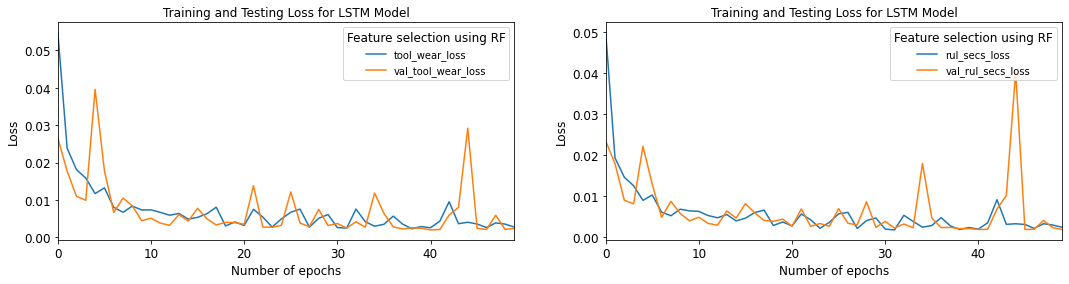

In [37]:
loss = history1.history['tool_wear_loss']
val_loss = history1.history['val_tool_wear_loss']

loss1 = history1.history['rul_secs_loss']
val_loss1 = history1.history['val_rul_secs_loss']

epochs_range = range(interation)

plt.rcParams['font.size'] = '12'

plt.figure(figsize=(18, 4))
plt.subplot(1,2,1)
plt.plot(epochs_range, loss, label='tool_wear_loss')
plt.plot(epochs_range, val_loss, label='val_tool_wear_loss')
plt.legend(loc='upper right')
plt.title('Training and Testing Loss for LSTM Model',fontsize=12.0)
plt.xlabel("Number of epochs",fontsize=12.0)
plt.ylabel("Loss",fontsize=12.0)
plt.xlim(min(epochs_range),max(epochs_range))
plt.legend(title = "Feature selection using RF",loc='upper right',prop={'size': 10})

plt.subplot(1,2,2)
plt.plot(epochs_range, loss1, label='rul_secs_loss')
plt.plot(epochs_range, val_loss1, label='val_rul_secs_loss')
plt.legend(loc='upper right')
plt.title('Training and Testing Loss for LSTM Model',fontsize=12.0)
plt.xlabel("Number of epochs",fontsize=12.0)
plt.ylabel("Loss",fontsize=12.0)
plt.xlim(min(epochs_range),max(epochs_range))
plt.legend(title = "Feature selection using RF",loc='upper right',prop={'size': 10})
plt.show()

In [38]:
y1_tool_wear_train,y2_rul_sec_train= model.predict(X1_train)

158/158 [==============================] - 1s 2ms/step


In [39]:
y1_tool_wear_test,y2_rul_sec_test= model.predict(X1_test)

53/53 [==============================] - 0s 3ms/step


In [40]:
data(y1_test,y1_tool_wear_test)

Accuracy: 0.9724902616704524
MAE     : 0.036683221706790545
MSE     : 0.002380528179278987
RMSE    : 0.04879065668013689


(0.9724902616704524,
 0.036683221706790545,
 0.002380528179278987,
 0.04879065668013689,
 9.618868710910384)

In [41]:
data(y2_test,y2_rul_sec_test)

Accuracy: 0.9761494063895014
MAE     : 0.028703150674360117
MSE     : 0.0018793418385767314
RMSE    : 0.043351376432320246


(0.9761494063895014,
 0.028703150674360117,
 0.0018793418385767314,
 0.043351376432320246,
 6.195449043850484)

In [42]:
data(y1_train,y1_tool_wear_train)

Accuracy: 0.9773649557600168
MAE     : 0.03498519801479649
MSE     : 0.0021298795811913493
RMSE    : 0.0461506184269653


(0.9773649557600168,
 0.03498519801479649,
 0.0021298795811913493,
 0.0461506184269653,
 9.724121962878822)

In [43]:
data(y2_train,y2_rul_sec_train)

Accuracy: 0.9852886282865184
MAE     : 0.02639889511355497
MSE     : 0.001244277293365879
RMSE    : 0.03527431492411835


(0.9852886282865184,
 0.02639889511355497,
 0.001244277293365879,
 0.03527431492411835,
 6.103800147670499)

In [44]:
#y1_test,y1_tool_wear_test
wear_test_pred = scale_y_wear.inverse_transform(np.array(y1_tool_wear_test).reshape(-1,1))
wear_test      = scale_y_wear.inverse_transform(np.array(y1_test).reshape(-1,1))

In [45]:
#y2_test,y2_rul_sec_test
rul_sec_pred      = scale_y_rul_sec.inverse_transform(np.array(y2_rul_sec_test).reshape(-1,1))
rul_sec_test      = scale_y_rul_sec.inverse_transform(np.array(y2_test).reshape(-1,1))

In [46]:
#wear_test_pred

In [47]:
#wear_test

In [48]:
wear_table = pd.DataFrame({"wear_test":wear_test.reshape(-1),"wear_pred":wear_test_pred.reshape(-1)})
wear_table = wear_table.sort_values('wear_test',ascending=False)#True
wear_table.head()

,wear_test,wear_pred
72,301.0,307.585907
524,301.0,301.893829
457,301.0,308.917877
1230,301.0,312.124695
1079,301.0,307.820129


In [49]:
rul_table = pd.DataFrame({"rul_test":rul_sec_test.reshape(-1),"rul_pred":rul_sec_pred.reshape(-1)})
rul_table = rul_table.sort_values('rul_test',ascending = True)#False
rul_table.head()

,rul_test,rul_pred
130,5.0,28.939188
1407,7.0,106.298431
1034,10.0,62.654545
340,14.0,19.119972
1543,19.0,45.297157


In [50]:
total = pd.concat([rul_table,wear_table],axis=1)
total

,rul_test,rul_pred,wear_test,wear_pred
130,5.0,28.939188,301.0,305.933197
1407,7.0,106.298431,301.0,303.382996
1034,10.0,62.654545,301.0,300.099426
340,14.0,19.119972,301.0,308.273926
1543,19.0,45.297157,301.0,309.216064
...,...,...,...,...
586,6673.0,6507.994629,60.0,62.901360
484,6678.0,6349.037598,60.0,68.335136
839,6685.0,6630.309570,60.0,54.397488
1600,6701.0,6474.897949,60.0,60.752708


In [51]:
from datetime import timedelta
list1 =[]
for i in total.rul_test.values:
    print(str(timedelta(seconds=i)))
    list1.append(str(timedelta(seconds=i)))
    #break

0:00:05
0:00:07
0:00:10
0:00:14
0:00:19
0:00:25
0:00:31
0:00:33
0:00:36
0:00:43
0:00:49
0:00:58
0:00:59
0:01:10
0:01:22
0:01:24
0:01:25
0:01:30
0:01:32
0:01:33
0:01:38
0:01:42
0:01:43
0:01:47
0:01:56
0:01:57
0:02:07
0:02:11
0:02:12
0:02:14
0:02:22
0:02:27
0:02:30
0:02:33
0:02:34
0:02:39
0:02:46
0:02:47
0:02:52
0:02:59
0:03:00
0:03:05
0:03:07
0:03:16
0:03:20
0:03:24
0:03:25
0:03:31
0:03:39
0:03:43
0:03:46
0:03:47
0:03:50
0:03:51
0:03:53
0:03:55
0:03:56
0:03:58
0:04:00
0:04:01
0:04:03
0:04:06
0:04:16
0:04:20
0:04:23
0:04:37
0:04:39
0:04:41
0:04:52
0:04:54
0:05:02
0:05:06
0:05:17
0:05:19
0:05:25
0:05:26
0:05:27
0:05:29
0:05:30
0:05:35
0:05:43
0:05:47
0:05:48
0:05:57
0:05:59
0:06:02
0:06:05
0:06:13
0:06:17
0:06:19
0:06:23
0:06:29
0:06:34
0:06:39
0:06:45
0:06:50
0:06:58
0:07:03
0:07:13
0:07:17
0:07:19
0:07:28
0:07:35
0:07:38
0:07:40
0:07:48
0:07:50
0:07:51
0:07:56
0:08:04
0:08:10
0:08:14
0:08:20
0:08:21
0:08:22
0:08:23
0:08:33
0:08:39
0:08:40
0:08:57
0:08:58
0:09:02
0:09:06
0:09:10
0:09:11


In [52]:
list2,list3 = [],[]
for j in range(0,len(list1),18):
    list2.append(j)
    #list3.append(list1[j])
    #print(j)

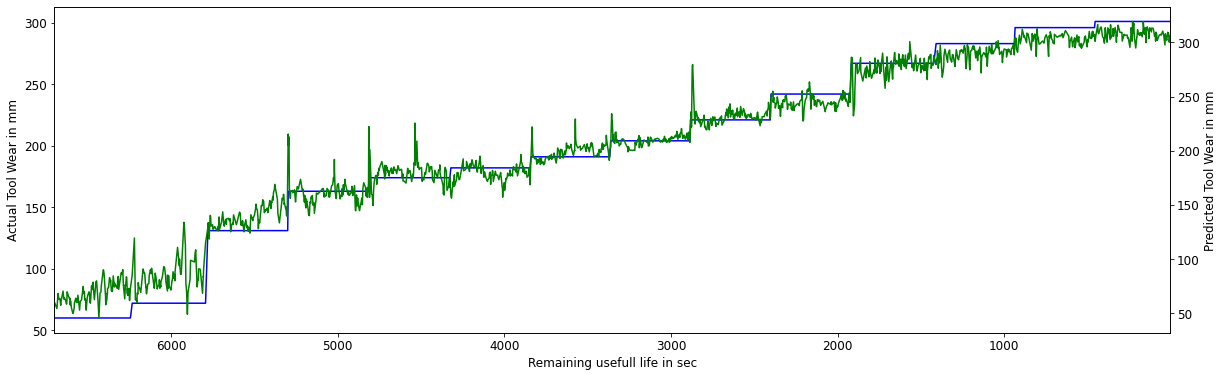

In [53]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(15,5))
fig, ax1 = plt.subplots()

rul_value  = total.rul_test.values
wear_value = total.wear_test.values
wear_pred  = total.wear_pred.values

ax1.plot(rul_value,wear_value,color="blue",label='Actual tool-wear')

ax2 = ax1.twinx()
ax2.plot(rul_value,wear_pred,color="green",label='Pred tool-wear')

ax1.set_ylabel("Actual Tool Wear in mm")#,color="blue")
ax2.set_ylabel("Predicted Tool Wear in mm")#,color="green")
ax1.set_xlabel("Remaining usefull life in sec")#,color="blue")

fig.set_size_inches(20,6)
ax1.set_xlim(rul_value[-1],rul_value[0])
#fig.legend()
#plt.legend()
plt.show()

In [54]:
total['timestamp'] = list1

In [55]:
total

,rul_test,rul_pred,wear_test,wear_pred,timestamp
130,5.0,28.939188,301.0,305.933197,0:00:05
1407,7.0,106.298431,301.0,303.382996,0:00:07
1034,10.0,62.654545,301.0,300.099426,0:00:10
340,14.0,19.119972,301.0,308.273926,0:00:14
1543,19.0,45.297157,301.0,309.216064,0:00:19
...,...,...,...,...,...
586,6673.0,6507.994629,60.0,62.901360,1:51:13
484,6678.0,6349.037598,60.0,68.335136,1:51:18
839,6685.0,6630.309570,60.0,54.397488,1:51:25
1600,6701.0,6474.897949,60.0,60.752708,1:51:41


In [56]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(15,5))
#fig, ax1 = plt.subplots()

#rul_value  = total.iloc[list2,:].timestamp
#wear_value = total.iloc[list2,:].wear_test
#wear_pred  = total.iloc[list2,:].wear_pred

#ax1.plot(rul_value,wear_value,color="blue",label='Actual tool-wear')

#ax2 = ax1.twinx()
#ax2.plot(rul_value,wear_pred,color="green",label='Pred tool-wear')

#ax1.set_ylabel("Actual Tool Wear in mm")#,color="blue")
#ax2.set_ylabel("Predicted Tool Wear in mm")#,color="green")
#ax1.set_xlabel("Remaining usefull life in sec")#,color="blue")

#fig.set_size_inches(20,6)
#ax1.set_xlim(rul_value[-1],rul_value[0])
#ax1.set_xlim(rul_value.values[-1],rul_value.values[0])
#ax1.set_xticklabels(rul_value, rotation =90)
#fig.legend()
#plt.legend()
#plt.show()

In [57]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(15,5))
#fig, ax1 = plt.subplots()

#rul_value  = total.iloc[list2,:].rul_test.values
#wear_value = total.iloc[list2,:].wear_test.values
#wear_pred  = total.iloc[list2,:].wear_pred.values

#ax1.plot(rul_value,wear_value,color="blue",label='Actual tool-wear')

#ax2 = ax1.twinx()
#ax2.plot(rul_value,wear_pred,color="green",label='Pred tool-wear')

#ax1.set_ylabel("Actual Tool Wear in mm")#,color="blue")
#ax2.set_ylabel("Predicted Tool Wear in mm")#,color="green")
#ax1.set_xlabel("Remaining usefull life in sec")#,color="blue")

#fig.set_size_inches(20,6)
#ax1.set_xlim(rul_value[-1],rul_value[0])
#fig.legend()
#plt.legend()
#plt.show()

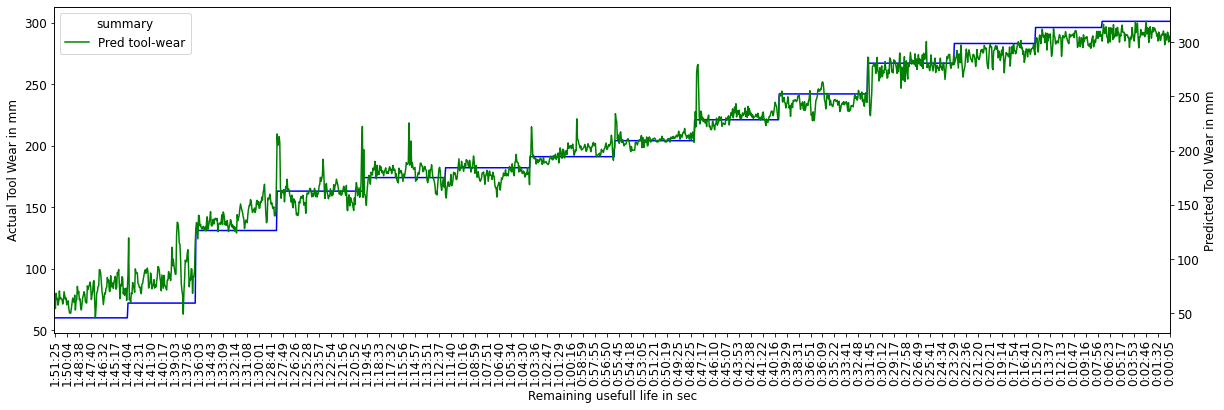

In [58]:
import matplotlib.pyplot as plt
from matplotlib.axis import Axis
from matplotlib import dates as mpl_dates
#plt.figure(figsize=(15,5))
fig, ax1 = plt.subplots()

rul_value  = total.timestamp
wear_value = total.wear_test
wear_pred  = total.wear_pred

ax1.plot(rul_value,wear_value,color="blue",label='Actual tool-wear')#color="blue"

ax2 = ax1.twinx()
ax2.plot(rul_value,wear_pred,color="green",label='Pred tool-wear')#color="green"
#plt.legend()
ax1.set_ylabel("Actual Tool Wear in mm")#,color="blue")
ax2.set_ylabel("Predicted Tool Wear in mm")#,color="green")
ax1.set_xlabel("Remaining usefull life in sec")#,color="blue")

fig.set_size_inches(20,6)

ax1.set_xlim(rul_value.values[-1],rul_value.values[0])

ax1.set_xticks(total.iloc[list2,:].timestamp)
ax1.set_xticklabels(total.iloc[list2,:].timestamp, rotation =90)
plt.legend(title='summary')
plt.show()